# Problem 2 Plot

## Notebook Configuration

In [15]:
# import packages
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colormaps

from rich import print
from tqdm import tqdm

In [2]:
# configure plotting
# define the figure save directory
figure_dir = Path("figures")
os.makedirs(figure_dir, exist_ok=True)

# set plot style
cstyle_file_url = r"https://gist.githubusercontent.com/CalvinSprouse/30bba681da1dd0023e948ca207fad0fc/raw/80a1ae94031873a57c9624103e83f5caf175ac86/cstyle.mplstyle"
plt.style.use(["default", cstyle_file_url])

## Calculation

In [6]:
# define the fine-structure energy correction function
def E_FS(n, j, alpha = None):
    # define alpha to be default value
    if alpha is None: alpha = 1/137

    # calculate the unperturbed energy
    E0 = -13.6/n**2

    # calculate the multiplicitive factor of E0
    E0_factor = 1 + (alpha**2/n**2)*( (n/(j + (1/2))) - (3/4) )

    # calculate and return the fine-structure correction
    return E0*E0_factor

In [8]:
# create the three-tuple of plotting values
energy_dict = {
    "j": [1/2, 1/2, 1/2, 1/2, 3/2, 3/2, 3/2, 3/2],
    "slope": [1, -1, 1/3, -1/3, 2, 2/3, -2/3, -2],
}
energy_df = pd.DataFrame(energy_dict)

# calculate the fine-structure energy from j with n=2
energy_df["E_FS"] = (E_FS(2, energy_df["j"]) + 3.4)*10**5

## Plotting

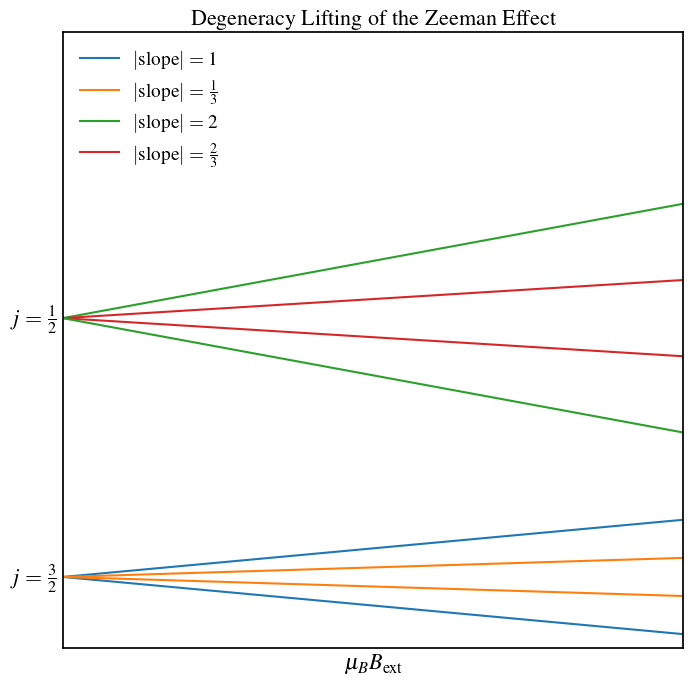

In [37]:
# plot energy degeneracy lifting
fig, ax = plt.subplots()

# color dictionary
# each unique magnitude of slope shall get its own color
color_dict = {}

# get a list of acceptable colors
colors = list(colormaps["tab10"].colors)

# on the vertical axis should be energy
# the energy is the sum of fine-structure energy and slope*the horizontal
# the horizontal represents B_ext
for i, (j, slope, E_FS) in energy_df.iterrows():
    # check if the slope is in the dict
    if abs(slope) not in color_dict:
        # convert slope to fractional representation
        if abs(slope) == 1/3:
            label_frac = r"\frac{1}{3}"
        elif abs(slope) == 2/3:
            label_frac = r"\frac{2}{3}"
        else:
            label_frac = str(int(abs(slope)))

        # add entry to color dict and define color label
        color_dict[abs(slope)] = colors.pop(0)
        label = r"\(\left| \text{slope} \right| =" + label_frac + "\)"
    else:
        label = None

    # plot
    ax.plot(
        np.linspace(0, 1, 100),
        E_FS + slope*np.linspace(0, 1, 100),
        color=color_dict[abs(slope)],
        label=label,
    )

# set the axis labels
ax.set_xlabel(r"\(\mu_B B_\text{ext}\)")
ax.set_ylabel("")

# set the vertical axis limits
ax.set_ylim(energy_df["E_FS"].min() - 1.25, energy_df["E_FS"].max() + 5)

# remove the vertica and horizontal axis labels and ticks
ax.yaxis.set_tick_params(which="both", left=False, right=False, labelleft=False)
ax.xaxis.set_tick_params(which="both", bottom=False, top=False, labelbottom=False)

# place two labels on the vertical axis at the two different values of E_FS
# the highest should be labeled j=1/2
# the lower should be labeled j=3/2
E_HF_high = energy_df["E_FS"].max()
E_HF_low = energy_df["E_FS"].min()
ax.text(-0.05, E_HF_high, r"\(j=\frac{1}{2}\)", ha="center", va="center")
ax.text(-0.05, E_HF_low, r"\(j=\frac{3}{2}\)", ha="center", va="center")

# set the title
ax.set_title(r"Degeneracy Lifting of the Zeeman Effect")

# set the legend to the top-left
ax.legend(loc="upper left")

# save the figure
fig.savefig(figure_dir / "energy_degeneracy_lifting")